# **Popularity Based Recommendation based on user Image**

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data=ImageDataGenerator(rescale=1/255.,validation_split=0.3)
dir='/content/drive/MyDrive/skin_color/'

X = Y = 224

training = data.flow_from_directory(dir,
                                    class_mode = "categorical",
                                    target_size = (X, Y),
                                    color_mode="rgb", 
                                    shuffle = False,
                                    subset='training',
                                    seed = 42)

validation = data.flow_from_directory(dir,
                                      class_mode = "categorical",
                                      target_size = (X, Y),
                                      color_mode="rgb", 
                                      subset='validation',
                                      shuffle = False,seed=42)

Found 270 images belonging to 3 classes.
Found 113 images belonging to 3 classes.


In [35]:
training.class_indices

{'Dark': 0, 'Fair': 1, 'Medium': 2}

# **CNN Model**

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
import tensorflow as tf

In [37]:
from tensorflow.keras.layers import MaxPooling2D

classifier=Sequential()
classifier.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(224,224,3)))
classifier.add(MaxPooling2D(pool_size=2))
classifier.add(Conv2D(filters=32,kernel_size=3,padding="same",activation ="relu"))
classifier.add(MaxPooling2D(pool_size=2))
classifier.add(Conv2D(filters=64,kernel_size=3,padding="same",activation ="relu"))
classifier.add(MaxPooling2D(pool_size=2))
classifier.add(Dropout(0.1))
classifier.add(Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"))
classifier.add(MaxPooling2D(pool_size=2))
classifier.add(Dropout(0.3))
classifier.add(Flatten())
classifier.add(Dense(256,activation="relu"))
classifier.add(Dropout(0.3))
classifier.add(Dense(128,activation="relu"))
classifier.add(Dropout(0.3))
classifier.add(Dense(3,activation="softmax"))
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_207 (Conv2D)         (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_208 (Conv2D)         (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_209 (Conv2D)         (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 28, 28, 64)      

In [38]:
classifier.load_weights('/content/drive/MyDrive/wights.h5')
classifier.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
loss,test_acc=classifier.evaluate(validation)

4/4 [==============================] - 20s 3s/step - loss: 0.5070 - accuracy: 0.8407


In [ ]:
loss_train,train_acc=classifier.evaluate(training)

9/9 [==============================] - 19s 2s/step - loss: 0.0521 - accuracy: 0.9815


## **Training model for images with pimples**

In [39]:
from zipfile import ZipFile
file_name='/content/drive/MyDrive/Skin_acne_pimples.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()

In [13]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data=ImageDataGenerator(rescale=1/255.,validation_split=0.3)

X = Y = 224
dir1 = '/content/Skin_acne_pimples/'

training1 = data.flow_from_directory(dir1,
                                    class_mode = "categorical",
                                    target_size = (X, Y),
                                    color_mode="rgb", 
                                    shuffle = True,
                                    subset='training',
                                    seed = 42)

validation1 = data.flow_from_directory(dir1,
                                      class_mode = "categorical",
                                      target_size = (X, Y),
                                      color_mode="rgb", 
                                      subset='validation',
                                      shuffle = True,seed=42)

Found 214 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [14]:
training1.class_indices

{'Acne': 0, 'Normal': 1, 'Pimples': 2}

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
import tensorflow as tf

In [17]:
classifier1=Sequential()
classifier1.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(224,224,3)))
classifier1.add(MaxPooling2D(pool_size=2))
classifier1.add(Conv2D(filters=32,kernel_size=3,padding="same",activation ="relu"))
classifier1.add(MaxPooling2D(pool_size=2))
classifier1.add(Conv2D(filters=64,kernel_size=3,padding="same",activation ="relu"))
classifier1.add(MaxPooling2D(pool_size=2))
classifier1.add(Dropout(0.1))
classifier1.add(Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"))
classifier1.add(MaxPooling2D(pool_size=2))
classifier1.add(Dropout(0.3))
classifier1.add(Flatten())
classifier1.add(Dense(256,activation="relu"))
classifier1.add(Dropout(0.3))
classifier1.add(Dense(128,activation="relu"))
classifier1.add(Dropout(0.3))
classifier1.add(Dense(3,activation="softmax"))
classifier1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_203 (Conv2D)         (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_204 (Conv2D)         (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_205 (Conv2D)         (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 64)      

In [18]:
classifier1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
classifier1.fit(training1,validation_data=validation1,epochs=10)

Epoch 1/10
7/7 [==============================] - 2s 362ms/step - loss: 0.1195 - accuracy: 0.9626 - val_loss: 1.3592 - val_accuracy: 0.6222
Epoch 2/10
7/7 [==============================] - 2s 275ms/step - loss: 0.0597 - accuracy: 0.9860 - val_loss: 2.0475 - val_accuracy: 0.6000
Epoch 3/10
7/7 [==============================] - 2s 276ms/step - loss: 0.1009 - accuracy: 0.9533 - val_loss: 1.9102 - val_accuracy: 0.5667
Epoch 4/10
7/7 [==============================] - 2s 276ms/step - loss: 0.0480 - accuracy: 0.9766 - val_loss: 1.7440 - val_accuracy: 0.6444
Epoch 5/10
7/7 [==============================] - 2s 304ms/step - loss: 0.0408 - accuracy: 0.9860 - val_loss: 1.7587 - val_accuracy: 0.6222
Epoch 6/10
7/7 [==============================] - 3s 412ms/step - loss: 0.0451 - accuracy: 0.9860 - val_loss: 2.6994 - val_accuracy: 0.5556
Epoch 7/10
7/7 [==============================] - 2s 291ms/step - loss: 0.0677 - accuracy: 0.9673 - val_loss: 2.5088 - val_accuracy: 0.6111
Epoch 8/10
7/7 [====

In [92]:
classifier1.save('/content/drive/MyDrive/weights_skin_acne_pimples.h5')

## **Data Cleaning and Preprocessing**

In [56]:
df = pd.read_csv('/content/drive/MyDrive/skindataall.csv')
df = df.drop('Unnamed: 0',axis=1)
df.drop(['Ing_Tfidf','Ingredients_Cleaned','Review_Cleaned','Good_Stuff','Rating','Combination','Dry','Normal','Sensitive','Oily'],axis=1,inplace=True)
df=df[['User_id','Username', 'Skin_Tone', 'Skin_Type', 'Eye_Color', 'Hair_Color',
       'Rating_Stars', 'Review','Product_id','Product', 'Brand', 'Price', 'Ingredients',
       'Category','Product_Url']]

In [57]:
df.head(1)


,User_id,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product_id,Product,Brand,Price,Ingredients,Category,Product_Url
0,3420,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,157,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",Cleanser,https://www.sephora.com/product/kale-spinach-g...


In [58]:
df['Skin_Type'].value_counts()

Combination    3567
No data        2106
Dry            1223
Oily            961
Normal          792
Name: Skin_Type, dtype: int64

In [59]:
df=df.drop_duplicates().reset_index(drop=True)
df.shape

(7498, 15)

In [60]:
df1=df.copy()

In [61]:
df1['Skin_Tone']=df1['Skin_Tone'].replace({'Deep':'Dark','Ebony':'Medium','Light':'Fair','Olive':'Medium','Porcelain':'Fair','Tan':'Dark'})

In [62]:
df1['Skin_Type']=df1['Skin_Type'].replace({'Combination':'Normal','No data':'Oily'})

In [64]:
x=np.random.randint(0,3,7498)
x[:19]

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2])

In [65]:
len(x)

7498

In [66]:
df1['Pimples_Acne']=x
df1['Pimples_Acne']=df1['Pimples_Acne'].replace({1:'Normal',2:'Pimples',0:'Acne'})

In [67]:
df1.head(1)

,User_id,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product_id,Product,Brand,Price,Ingredients,Category,Product_Url,Pimples_Acne
0,3420,allyp3,Medium,Normal,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,157,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",Cleanser,https://www.sephora.com/product/kale-spinach-g...,Acne


In [81]:
df1.loc[df1['Pimples_Acne']=='Pimples','Suggestions']='Try to avoid oily food and consume more vegetables and fruits '
df1.loc[df1['Pimples_Acne']=='Acne','Suggestions']='Try to avoid oily food and consume more vegetables and fruits '
df1.loc[df1['Pimples_Acne']=='Normal','Suggestions']='Try maintaining the same diet'
df1.loc[(df1['Pimples_Acne']=='Normal')&(df1['Skin_Type']=='Dry'),'Suggestions'] ='Try consuming beans,avacados,,kiwi fruit,sunflower seeds and mosturize regulary to avoid dry skin'
df1.loc[(df1['Pimples_Acne']=='Normal')&(df1['Skin_Type']=='Oily'),'Suggestions']='Try to avoid diary products and oily foods and try washing face twice a day to avoid oily face'

In [82]:
popular=df1[['User_id','Product_id','Product','Category','Skin_Tone','Skin_Type','Pimples_Acne','Suggestions','Rating_Stars']]
popular=popular.drop_duplicates(['User_id','Product_id']).reset_index(drop=True)
popular.head()

,User_id,Product_id,Product,Category,Skin_Tone,Skin_Type,Pimples_Acne,Suggestions,Rating_Stars
0,3420,157,Superfood Antioxidant Cleanser,Cleanser,Medium,Normal,Acne,Try to avoid oily food and consume more vegeta...,5
1,2483,157,Superfood Antioxidant Cleanser,Cleanser,Medium,Normal,Pimples,Try to avoid oily food and consume more vegeta...,1
2,2715,157,Superfood Antioxidant Cleanser,Cleanser,No data,Oily,Pimples,Try to avoid oily food and consume more vegeta...,5
3,4497,157,Superfood Antioxidant Cleanser,Cleanser,Fair,Dry,Pimples,Try to avoid oily food and consume more vegeta...,5
4,5017,157,Superfood Antioxidant Cleanser,Cleanser,Fair,Normal,Acne,Try to avoid oily food and consume more vegeta...,5


In [83]:
popular.groupby(['Skin_Tone','Skin_Type','Pimples_Acne'])['Rating_Stars'].mean()

Skin_Tone  Skin_Type  Pimples_Acne
Dark       Dry        Acne            3.571429
                      Normal          3.903226
                      Pimples         3.714286
           Normal     Acne            4.143836
                      Normal          4.242857
                      Pimples         3.917808
           Oily       Acne            4.084746
                      Normal          4.177419
                      Pimples         3.800000
Fair       Dry        Acne            4.068441
                      Normal          4.157205
                      Pimples         4.092050
           Normal     Acne            4.181189
                      Normal          4.144444
                      Pimples         4.112450
           Oily       Acne            4.196429
                      Normal          4.060345
                      Pimples         4.241667
Medium     Dry        Acne            4.117647
                      Normal          4.075000
                      Pim

## **Testing By taking a sample image**

In [87]:
def recommend(path):
  img = cv2.imread(path, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224,224))
  img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
  plt.imshow(img)
  img=img/255.
  img=img.reshape(1,224,224,3)

  ypred=classifier.predict(img)
  pred=ypred.argmax()
  class_names={1:'Fair',2:'Medium',0:'Dark'}
  for key in class_names.keys():
    if(pred==key):
      skin_color=class_names[key]
  print('Skin Color is:',skin_color)

  ypred1=classifier1.predict(img)
  pred1=ypred1.argmax()
  class_names1={1:'Normal',2:'Pimples',0:'Acne'}
  for key in class_names1.keys():
    if(pred1==key):
      cp=class_names1[key]
  print('Presence of Pimples or acne:',cp)
  
  cc=str(input('Enter Skin_Type:'))
  pop = popular[(popular['Skin_Tone']==skin_color)&(popular['Skin_Type']==cc)&(popular['Pimples_Acne']==cp)]
  pop = pop[pop['Rating_Stars']>3]
  pop = pop.sort_values(by='Rating_Stars', ascending=False)
  return pop[:5]
  
  


Skin Color is: Fair
Presence of Pimples or acne: Pimples
Enter Skin_Type:Normal


,User_id,Product_id,Product,Category,Skin_Tone,Skin_Type,Pimples_Acne,Suggestions,Rating_Stars
8,5021,157,Superfood Antioxidant Cleanser,Cleanser,Fair,Normal,Pimples,Try to avoid oily food and consume more vegeta...,5
4782,6459,164,Martian Mattifying Melting Water-Gel Toner,Cleanser,Fair,Normal,Pimples,Try to avoid oily food and consume more vegeta...,5
4999,4642,119,Facial Radiance Polish,Cleanser,Fair,Normal,Pimples,Try to avoid oily food and consume more vegeta...,5
4980,945,148,Hydrating Essence Toner,Cleanser,Fair,Normal,Pimples,Try to avoid oily food and consume more vegeta...,5
4973,6026,148,Hydrating Essence Toner,Cleanser,Fair,Normal,Pimples,Try to avoid oily food and consume more vegeta...,5


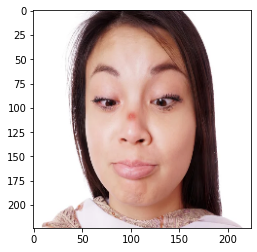

In [94]:
recommend('/content/Skin_acne_pimples/Pimples/depositphotos_57473273-stock-photo-red-pimple-on-nose.jpg')

Skin Color is: Dark
Presence of Pimples or acne: Normal
Enter Skin_Type:Oily


,User_id,Product_id,Product,Category,Skin_Tone,Skin_Type,Pimples_Acne,Suggestions,Rating_Stars
84,6411,35,Beste™ No. 9 Jelly Cleanser,Cleanser,Dark,Oily,Normal,Try to avoid diary products and oily foods and...,5
5725,2191,283,Turbo Booster C Powder,Treatment,Dark,Oily,Normal,Try to avoid diary products and oily foods and...,5
4041,4141,38,Black Charcoal Blotting Linens,Cleanser,Dark,Oily,Normal,Try to avoid diary products and oily foods and...,5
4481,23,204,Problem Solution Toner,Cleanser,Dark,Oily,Normal,Try to avoid diary products and oily foods and...,5
4501,1508,9,Acne Clearing Wash,Cleanser,Dark,Oily,Normal,Try to avoid diary products and oily foods and...,5


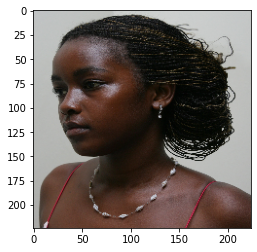

In [89]:
recommend('/content/drive/MyDrive/test.jpg')

Skin Color is: Fair
Presence of Pimples or acne: Acne
Enter Skin_Type:Normal


,User_id,Product_id,Product,Category,Skin_Tone,Skin_Type,Pimples_Acne,Suggestions,Rating_Stars
4,5017,157,Superfood Antioxidant Cleanser,Cleanser,Fair,Normal,Acne,Try to avoid oily food and consume more vegeta...,5
4718,5118,114,FAB Skin Lab Resurfacing Liquid 10% AHA,Cleanser,Fair,Normal,Acne,Try to avoid oily food and consume more vegeta...,5
4873,4164,277,Tonique Douceur Softening Hydrating Toner with...,Cleanser,Fair,Normal,Acne,Try to avoid oily food and consume more vegeta...,5
4854,136,3,3 Muslin Cloths,Cleanser,Fair,Normal,Acne,Try to avoid oily food and consume more vegeta...,5
4848,1914,3,3 Muslin Cloths,Cleanser,Fair,Normal,Acne,Try to avoid oily food and consume more vegeta...,5


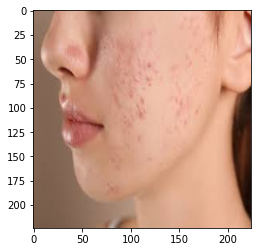

In [95]:
recommend('/content/Skin_acne_pimples/Acne/download.jpg')

Skin Color is: Medium
Presence of Pimples or acne: Normal
Enter Skin_Type:Normal


,User_id,Product_id,Product,Category,Skin_Tone,Skin_Type,Pimples_Acne,Suggestions,Rating_Stars
3173,3650,66,Cleansing Wipes - Rose - Moisturizing,Cleanser,Medium,Normal,Normal,Try maintaining the same diet,5
4284,2877,83,Crème Radiance Gentle Cleansing Creamy-Foam Cl...,Cleanser,Medium,Normal,Normal,Try maintaining the same diet,5
4014,1594,2,3% Glycolic Solutions Cleanser,Cleanser,Medium,Normal,Normal,Try maintaining the same diet,5
4015,1161,2,3% Glycolic Solutions Cleanser,Cleanser,Medium,Normal,Normal,Try maintaining the same diet,5
4147,4504,253,SUPERCLEANSE™ Clearing Cream-to-Foam Cleanser,Cleanser,Medium,Normal,Normal,Try maintaining the same diet,5


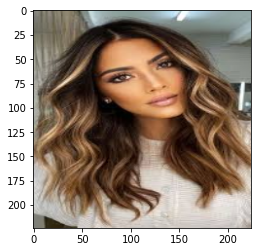

In [93]:
recommend('/content/Skin_acne_pimples/Normal/images (83).jpg')